#Metody klasteryzacji (uczenie nienadzorowane)

In [2]:
import numpy as np
from sklearn.datasets import make_blobs

np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

In [3]:
import time
from sklearn.cluster import KMeans

k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

In [4]:
from sklearn.cluster import MiniBatchKMeans

mbk = MiniBatchKMeans(
    init="k-means++",
    n_clusters=3,
    batch_size=batch_size,
    n_init=10,
    max_no_improvement=10,
    verbose=0,
)
t0 = time.time()
mbk.fit(X)
t_mini_batch = time.time() - t0

In [5]:
from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
order = pairwise_distances_argmin(k_means.cluster_centers_, mbk.cluster_centers_)
mbk_means_cluster_centers = mbk.cluster_centers_[order]

k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)
mbk_means_labels = pairwise_distances_argmin(X, mbk_means_cluster_centers)


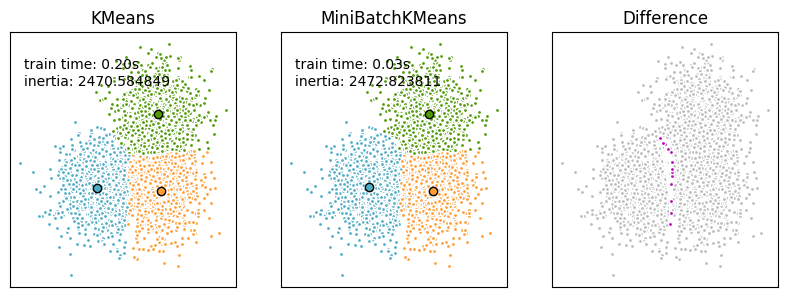

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["#4EACC5", "#FF9C34", "#4E9A06"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = mbk_means_labels == k
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_mini_batch, mbk.inertia_))

# Initialize the different array to all False
different = mbk_means_labels == 4
ax = fig.add_subplot(1, 3, 3)

for k in range(n_clusters):
    different += (k_means_labels == k) != (mbk_means_labels == k)

identic = np.logical_not(different)
ax.plot(X[identic, 0], X[identic, 1], "w", markerfacecolor="#bbbbbb", marker=".")
ax.plot(X[different, 0], X[different, 1], "w", markerfacecolor="m", marker=".")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

#Problem - czy cyfry sie klasteryzuja?

In [16]:
from sklearn.datasets import load_digits

X,Y = load_digits(return_X_y=True)

In [17]:
from sklearn.decomposition import PCA

pca_digits_4 = PCA(n_components=4)

pca_digits_4.fit(X)

PCA(n_components=4)

In [18]:
pca_digits_4.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979])

In [28]:
from matplotlib import pyplot as plt

def plotCluster(clabels, cnum, X):
  mask = (clabels == cnum)
  cluster = X[mask]
  for i in range(10):
    plt.imshow(cluster[i,:].reshape(8,8), cmap="gray")
    plt.show()

In [20]:
from sklearn.cluster import KMeans, OPTICS, DBSCAN
kmc = KMeans(n_clusters=10)
kmc.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [21]:
labels=kmc.predict(X)

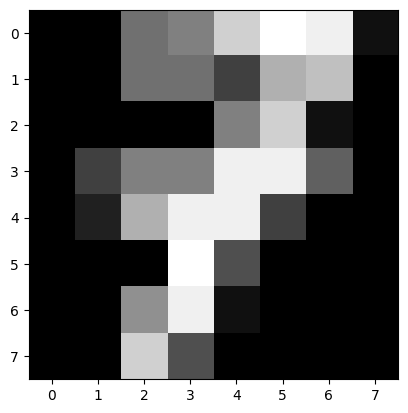

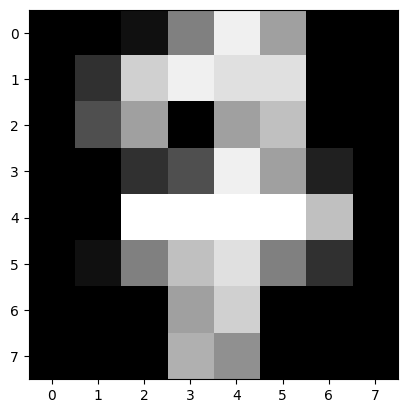

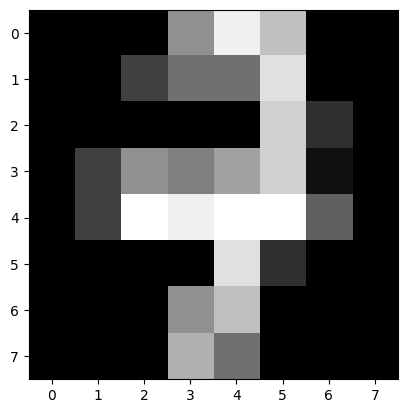

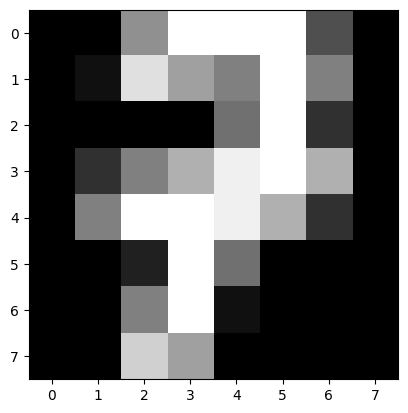

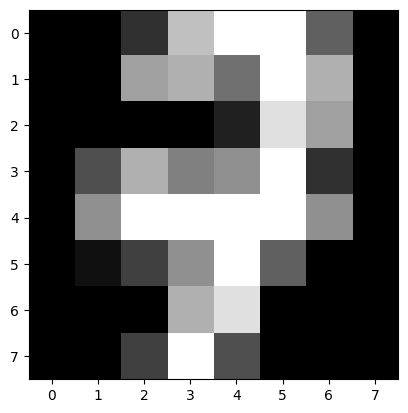

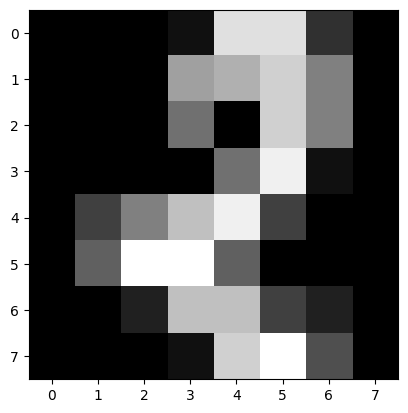

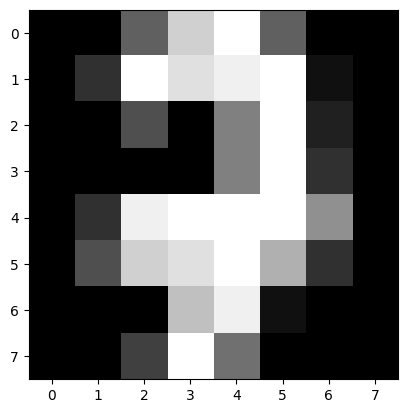

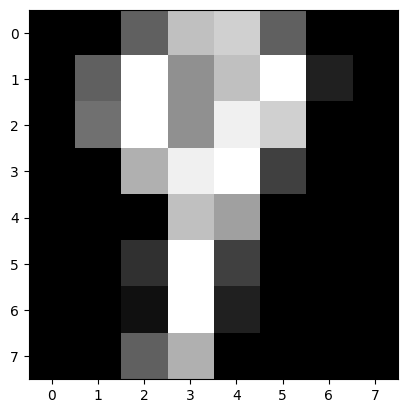

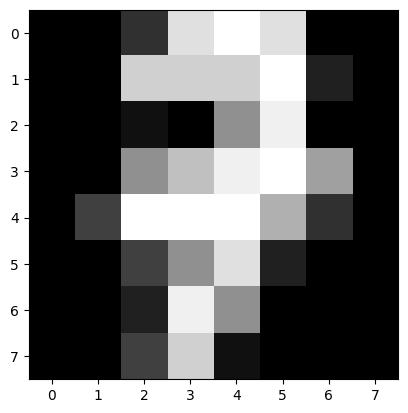

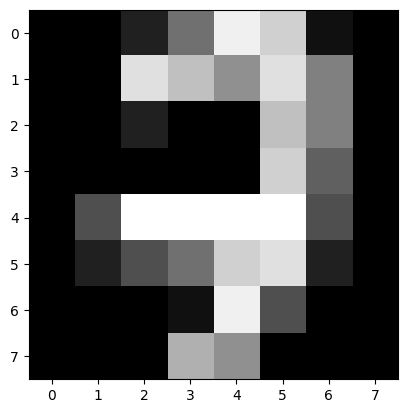

In [29]:
plotCluster(labels, 2, X)

In [43]:
optc=OPTICS(min_samples=12, metric='cosine')

optc.fit(X)
optc.labels_

array([ 0, -1, -1, ..., -1, -1, -1])

In [44]:
import numpy as np
np.unique(optc.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7]),
 array([1271,  178,  175,   46,   49,   21,   13,   18,   26]))

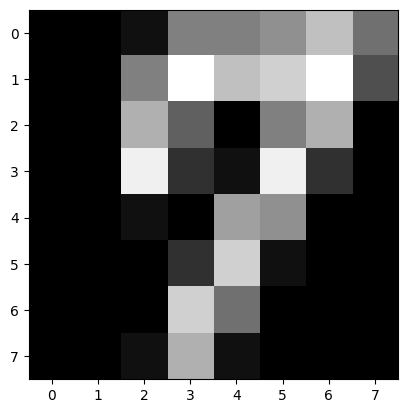

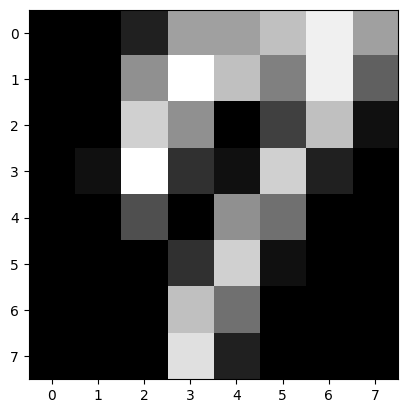

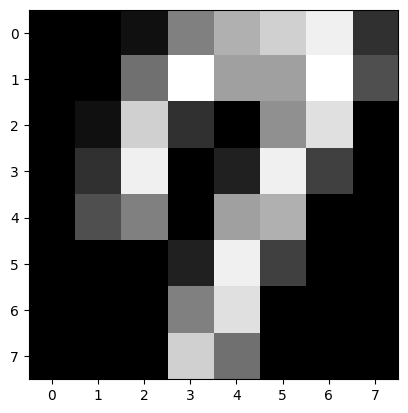

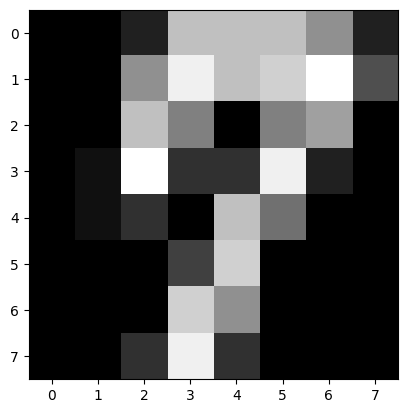

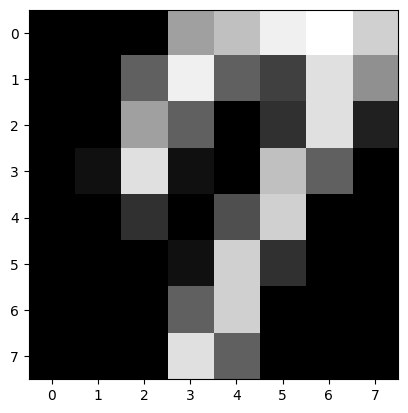

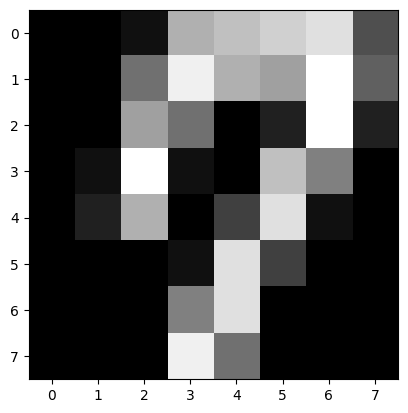

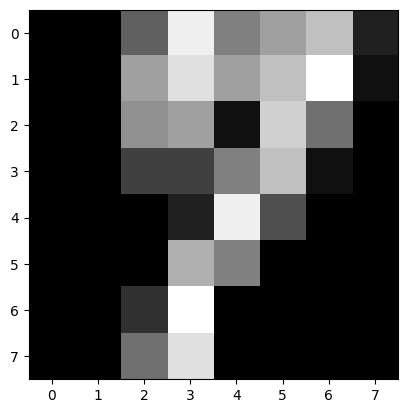

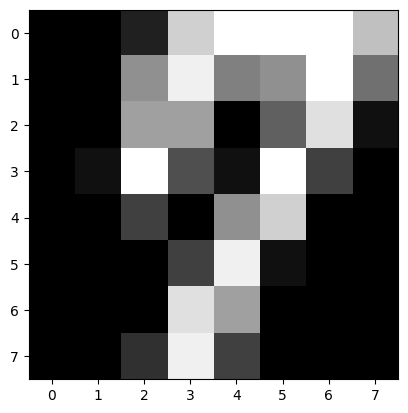

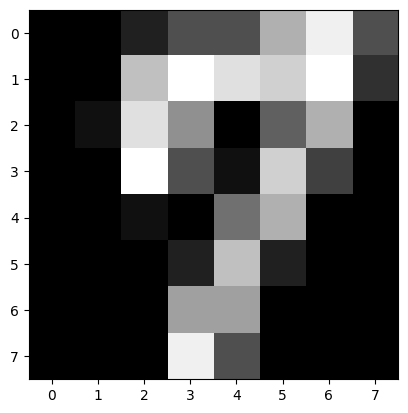

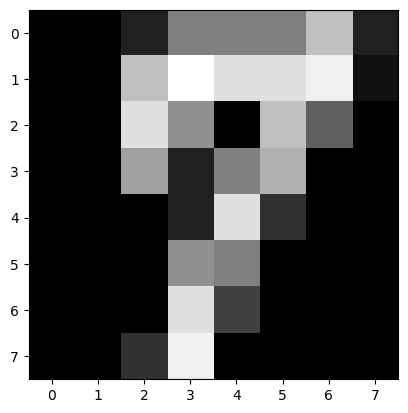

In [39]:
plotCluster(optc.labels_, 4, X)

In [45]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=10)

In [47]:
agc.fit(X)

agc.labels_

array([7, 9, 4, ..., 4, 1, 4])

In [48]:
np.unique(agc.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([181, 317, 197, 196, 191, 178, 181, 178,  80,  98]))

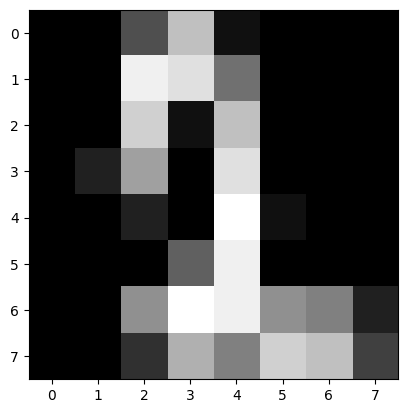

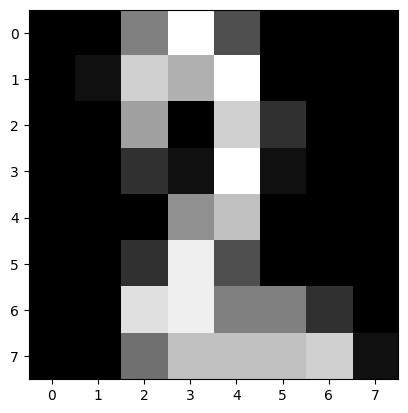

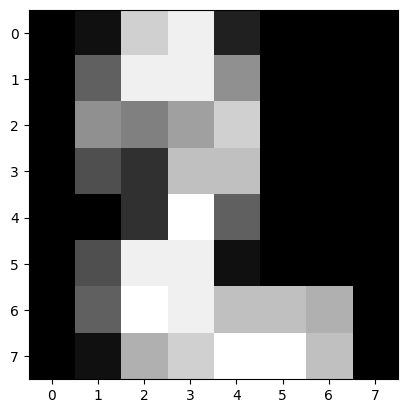

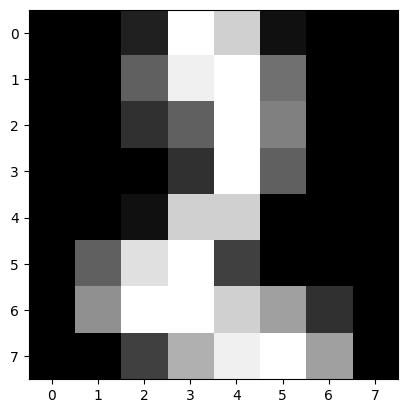

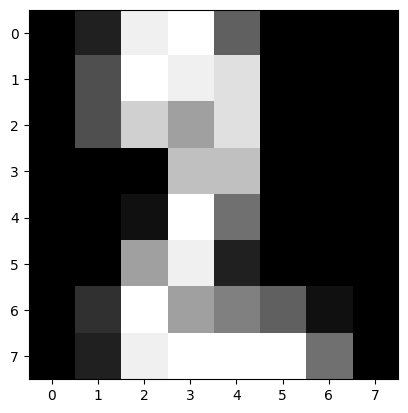

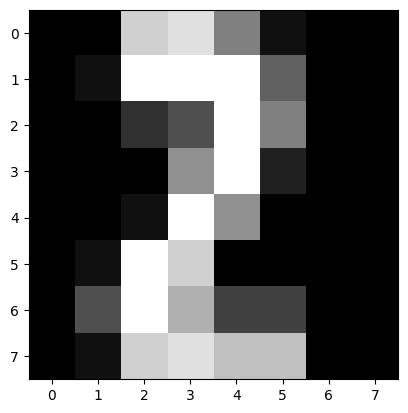

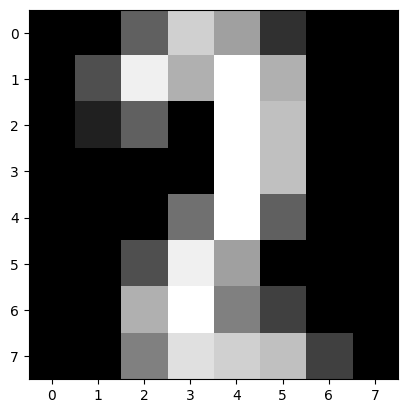

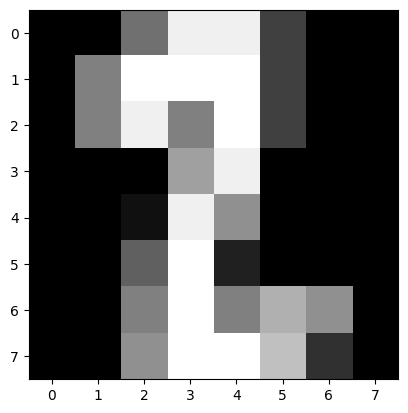

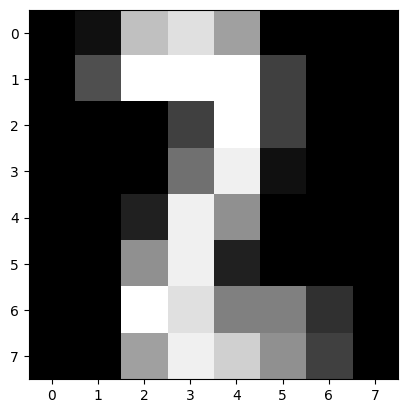

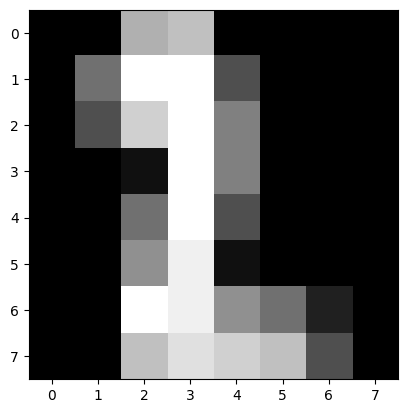

In [55]:
plotCluster(agc.labels_, 2, X)